# MetaData Descriptives
The purpose of this notebook is to extract some descriptive features of the collateral portfolio dataset which are not limited to the end-of-day price time-series. 

## Objectives
->> Read in the data 

->> Construct descriptives

->> Plot & write-up

->> Latest version (of data): 
```
/Users/Dim/Desktop/school_folder/masters_thesis/gitCodeRepo/data/metaData_20160809.csv
```

## Suggestions
->> Create histogram for the rule criteria i.e. hist(last_update_date), hist(VOLUME_AVG_6M)

->> Ask Tim for a reference to the JPMorgan RiskMetrics documentation that describes the use of last_value in the case of nearby missing data

In [15]:
%matplotlib inline
# coding=utf-8

import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Set plot style to be akin to R-ggplot2
plt.style.use('ggplot')

## Read metadata .csv file
path = '/Users/Dim/Desktop/school_folder/masters_thesis/gitCodeRepo/data/metaData_20160809.csv'
df = pd.read_csv(path, sep = ';')

## Eliminate additional index variables i.e. 'MXHK Index ISIN' used for investigation 
eps = ['MXAS0IN Index ISIN', 'MXHK Index ISIN', 'MMDUAAJ Index ISIN', 'MXASJ Index ISIN', 'HKDUSD BGN Curncy ISIN']
isinVec = [set(df['BBG_ISIN'])-set(eps)]
for item in eps:
    df = df[df.BBG_ISIN != item]
    
df.head(10)

,SEARCH_ISIN,BBG_ISIN,NAME,INDUSTRY_SECTOR,INDUSTRY_SUBGROUP,MKT_CAP_LAST_TRD,CUR_MKT_CAP,has_large_mkt_cap,has_large_mkt_cap.1,has_large_mkt_cap.2,...,SECURITY_TYP,CNTRY_OF_DOMICILE,CRNCY,LAST_UPDATE_DT,RTG_SP_LT_LC_ISSUER_CREDIT,RTG_MDY_ISSUER,VOLUME_AVG_6M,CNTRY_OF_RISK,ULT_PARENT_CNTRY_OF_RISK,GICS_SECTOR_NAME
0,AU000000RIO1 ISIN,AU000000RIO1 Equity ISIN,RIO TINTO LTD,Basic Materials,Metal-Diversified,61687.57986,61687579856,1,1,1,...,Common Stock,GB,USD,21.07.2016,A-,Baa1,151.2283478,GB,GB,Materials
1,BE0003793107 ISIN,BE0003793107 Equity ISIN,ANHEUSER-BUSCH INBEV SA/NV,"Consumer, Non-cyclical",Brewery,197262.9642,1.97263E+11,1,1,1,...,Common Stock,BE,USD,08.08.2016,A-,NaN,17700.62109,BE,BE,Consumer Staples
2,CH0011037469 ISIN,CH0011037469 Equity ISIN,SYNGENTA AG-REG,Basic Materials,Agricultural Chemicals,36295.26219,36295263315,1,0,1,...,Common Stock,CH,USD,08.08.2016,A+ *-,A2 *-,2689.37793,CH,CH,Materials
3,CH0011075394 ISIN,CH0011075394 Equity ISIN,ZURICH INSURANCE GROUP AG,Financial,Multi-line Insurance,36198.1294,36198129212,1,0,1,...,Common Stock,CH,USD,05.08.2016,NaN,NaN,377.0157471,CH,CH,Financials
4,CH0012032048 ISIN,CH0012032048 Equity ISIN,ROCHE HOLDING AG-GENUSSCHEIN,"Consumer, Non-cyclical",Medical-Drugs,217356.7994,2.17357E+11,1,1,1,...,Common Stock,CH,USD,08.08.2016,AA,A1,4084.70874,CH,CH,Health Care
5,CH0012032113 ISIN,CH0012032113 Equity ISIN,ROCHE HOLDING AG-BR,"Consumer, Non-cyclical",Medical-Drugs,217356.7994,2.17357E+11,1,1,1,...,Common Stock,CH,USD,08.08.2016,AA,A1,42.99212646,CH,CH,Health Care
6,CH0012221716 ISIN,CH0012221716 Equity ISIN,ABB LTD-REG,Industrial,Machinery-Electric Util,47212.78767,47212789530,1,0,1,...,Common Stock,CH,USD,29.07.2016,A,A2,41369.77344,CH,CH,Industrials
7,CH0038863350 ISIN,CH0038863350 Equity ISIN,NESTLE SA-REG,"Consumer, Non-cyclical",Food-Misc/Diversified,244827.4006,2.44827E+11,1,1,1,...,Common Stock,CH,USD,08.08.2016,AA,Aa2,31862.12695,CH,CH,Consumer Staples
8,CH0244767585 ISIN,CH0244767585 Equity ISIN,UBS GROUP AG-REG,Financial,Diversified Banking Inst,52171.27127,52171270531,1,1,1,...,Common Stock,CH,USD,08.08.2016,A-,NaN,2893899.75,CH,CH,Financials
9,CNE1000001Q4 ISIN,CNE1000001Q4 Equity ISIN,CHINA CITIC BANK CORP LTD-H,Financial,Commer Banks Non-US,40606.84548,40606845483,1,0,1,...,Common Stock,CN,USD,25.07.2016,NaN,NaN,190.2362213,CN,CN,Financials


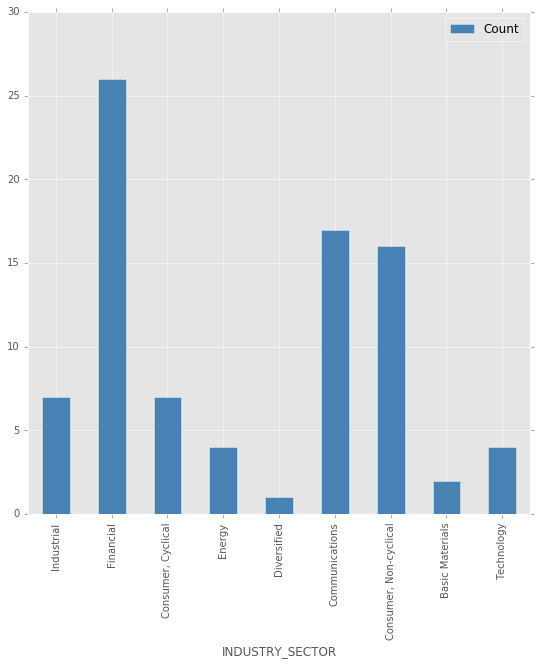

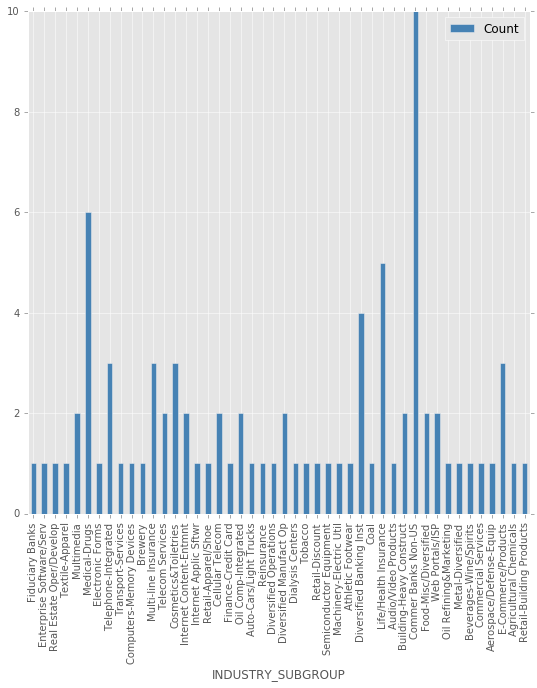

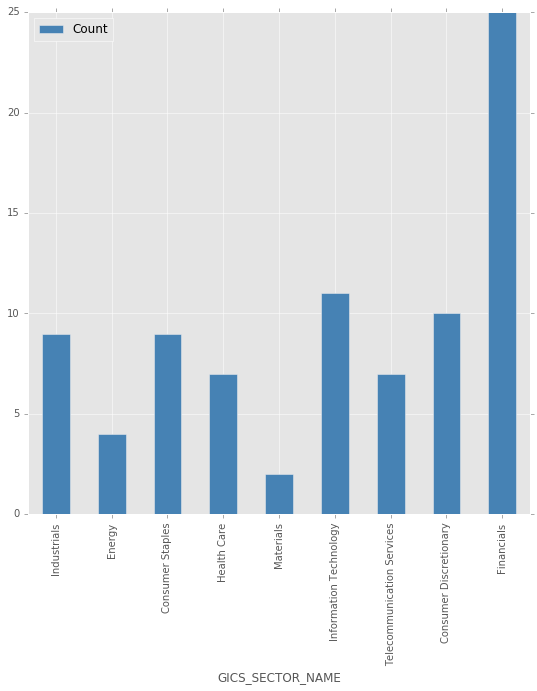

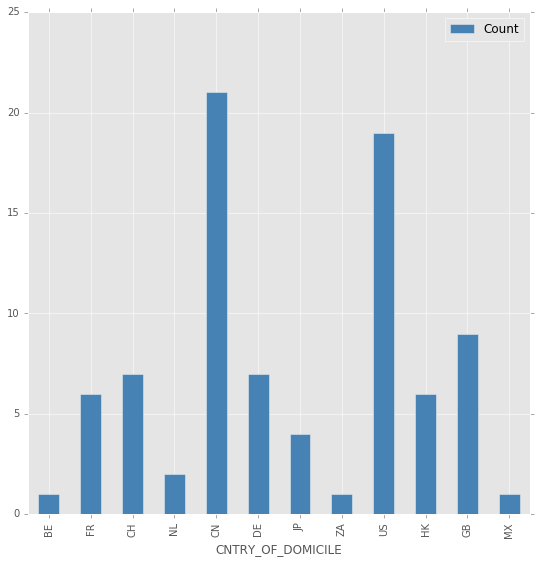

In [72]:
## Extracting descriptive information 
colNames = pd.DataFrame(df.columns)

## Descriptives
# Function getCounts: used to obtain counts for various items in meta-data
# @param col: column name
# @param setX: a set containing unique attributes under the column name, as above
# @param df: the dataframe from which to extract the information 
def getCounts(col, setX, df):
    a = pd.DataFrame({'Identifier' : [], 
                      'Count' : []})
    for item in setX:
        count = sum(df[col] == item)
        a = a.append(pd.DataFrame({'Identifier' : [item], 
                                   'Count' : [count]}), ignore_index = True)
    return a

# Create a placeholder list & select items of interest from mnemonics
frames = []
names  = ['INDUSTRY_SECTOR', 'INDUSTRY_SUBGROUP', 'GICS_SECTOR_NAME', 'CNTRY_OF_DOMICILE']

# Populate count information
for name in names:
    a = getCounts(col = name, setX = set(df[name]), df = df)
    a = a.set_index(a.Identifier)
    a = a.drop('Identifier', axis = 1)
    a.index.name = name
    frames.append(a)

for i in frames:
    i.plot(kind='bar', figsize=(9,9), color='steelblue'); plt.axhline(0, color='k')
    plt.savefig("barplot_" 
                + i.index.name + "_"
                + datetime.datetime.strftime(datetime.datetime.now(), '%Y-%m-%d')
                + ".eps", format='eps', dpi=1000, bbox_inches='tight')
    


In [ ]:
namesStacked = ['RTG_SP_LT_LC_ISSUER_CREDIT', 'RTG_MDY_ISSUER']


In [5]:
## Stacked bar plots along multiple dimensions i.e. country & sector

# @param col1: first dimension of data
# @param col2: second dimension of data
# @param setX: set of column entries w,r,t col1 or the first data dimension
# @param setY: set of column entries w,r,t col2 or the second data dimension
# @param df: the main dataframe used to extract the data
def getSubCounts(col1, col2, setX, setY, df):
    bucket = []
    for item1 in setX:
        container = []
        for item2 in setY:
            one = (df[col1] == item1)
            two = (df[col2] == item2)
            count = sum(np.logical_and(one, two))
            a = {'item1': item1, 'item2': item2, 'count': count}
            container.append(a)
        bucket.append(container)
    return bucket

crossTable_country_rating = getSubCounts('CNTRY_OF_DOMICILE', 
                                         'RTG_MDY_ISSUER', 
                                         setX = set(df['CNTRY_OF_DOMICILE']), 
                                         setY = set(df['RTG_MDY_ISSUER']), 
                                         df = df)

crossTable_country_sector = getSubCounts('CNTRY_OF_DOMICILE', 
                                         'INDUSTRY_SECTOR', 
                                         setX=set(df['CNTRY_OF_DOMICILE']), 
                                         setY=set(df['INDUSTRY_SECTOR']), 
                                         df = df)

crossTable_sector_rating = getSubCounts('INDUSTRY_SECTOR',
                                       'RTG_MDY_ISSUER',
                                       setX =set(df['INDUSTRY_SECTOR']),
                                       setY = set(df['RTG_MDY_ISSUER']), 
                                       df = df)

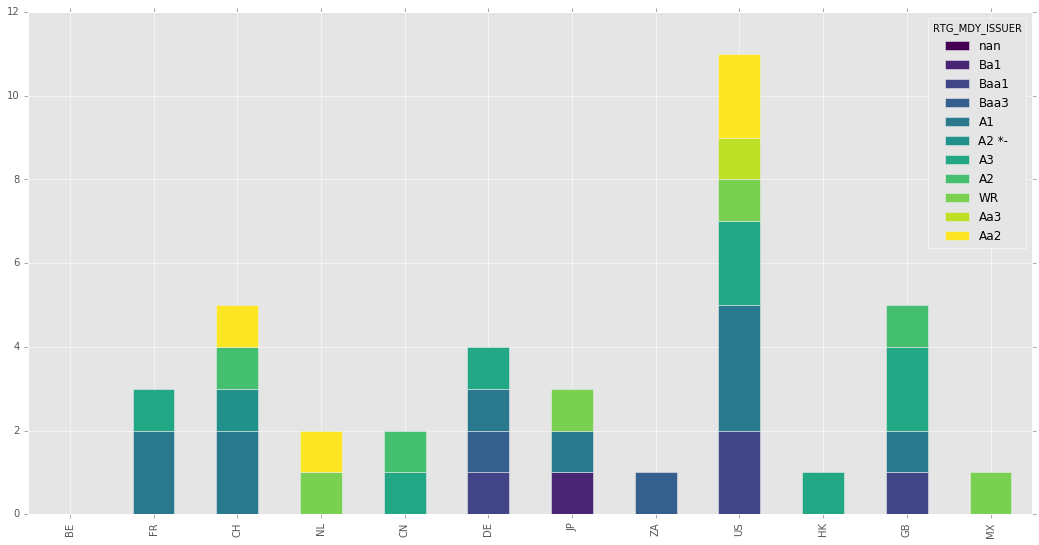

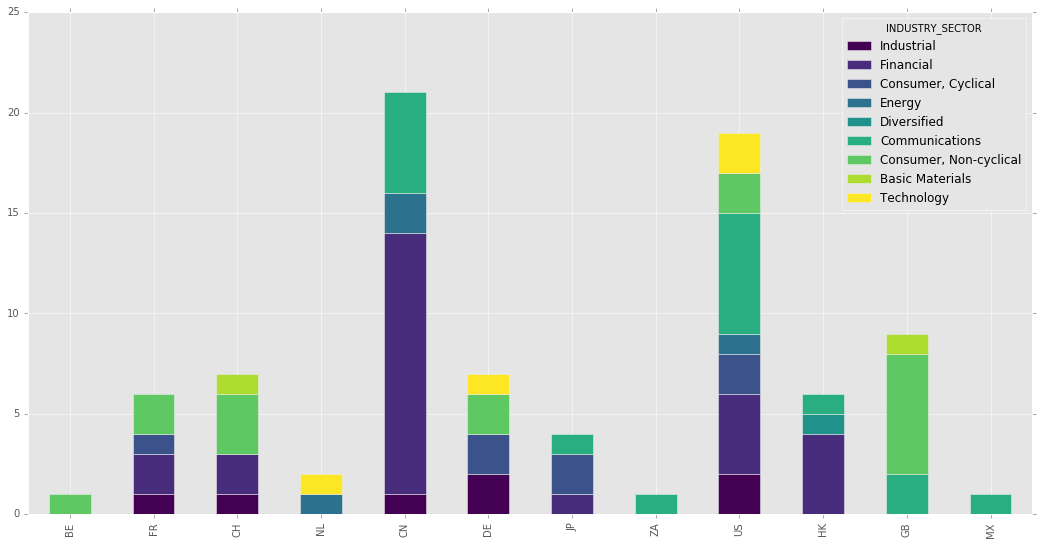

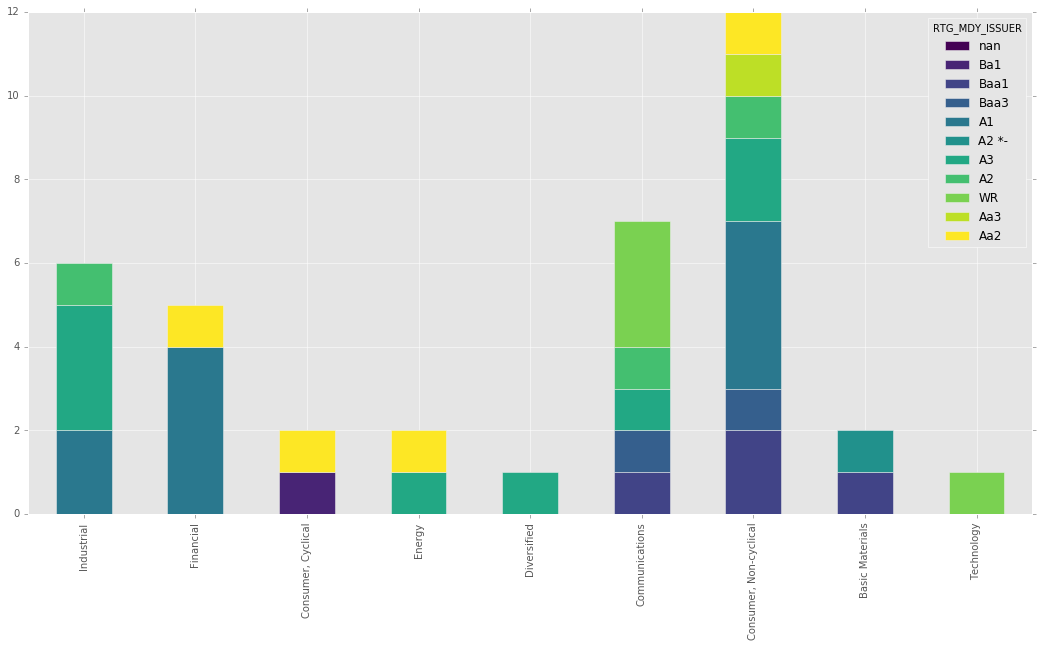

In [20]:
bucket = pd.DataFrame()
for item in crossTable_country_rating:
    frame = pd.DataFrame(item)
    frame = frame.set_index(frame.item2)
    frame.rename(columns={'count':frame.item1.unique()[0]}, inplace=True)
    frame.index.name = 'RTG_MDY_ISSUER'
    frame = frame.drop(['item1', 'item2'], axis=1)
    #frame.transpose().plot(kind='bar', stacked=True)
    frame = frame.transpose()
    bucket = bucket.append(frame) 

bucket.plot(kind='bar', stacked=True, figsize=(18,9), colormap='viridis'); plt.axhline(0, color='k')
plt.savefig("barplotStacked_" 
                + "country_rating_"
                + datetime.datetime.strftime(datetime.datetime.now(), '%Y-%m-%d')
                + ".eps", format='eps', dpi=1000, bbox_inches='tight')

bucket = pd.DataFrame()
for item in crossTable_country_sector:
    frame = pd.DataFrame(item)
    frame = frame.set_index(frame.item2)
    frame.rename(columns={'count':frame.item1.unique()[0]}, inplace=True)
    frame.index.name = 'INDUSTRY_SECTOR'
    frame = frame.drop(['item1', 'item2'], axis=1)
    #frame.transpose().plot(kind='bar', stacked=True)
    frame = frame.transpose()
    bucket = bucket.append(frame) 

bucket.plot(kind='bar', stacked=True, figsize=(18,9), colormap='viridis'); plt.axhline(0, color='k')
plt.savefig("barplotStacked_" 
                + "country_industry_"
                + datetime.datetime.strftime(datetime.datetime.now(), '%Y-%m-%d')
                + ".eps", format='eps', dpi=1000, bbox_inches='tight')

bucket = pd.DataFrame()
for item in crossTable_sector_rating:
    frame = pd.DataFrame(item)
    frame = frame.set_index(frame.item2)
    frame.rename(columns={'count':frame.item1.unique()[0]}, inplace=True)
    frame.index.name = 'RTG_MDY_ISSUER'
    frame = frame.drop(['item1', 'item2'], axis=1)
    #frame.transpose().plot(kind='bar', stacked=True)
    frame = frame.transpose()
    bucket = bucket.append(frame) 

bucket.plot(kind='bar', stacked=True, figsize=(18,9), colormap='viridis'); plt.axhline(0, color='k')
plt.savefig("barplotStacked_" 
                + "sector_rating_"
                + datetime.datetime.strftime(datetime.datetime.now(), '%Y-%m-%d')
                + ".eps", format='eps', dpi=1000, bbox_inches='tight')

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


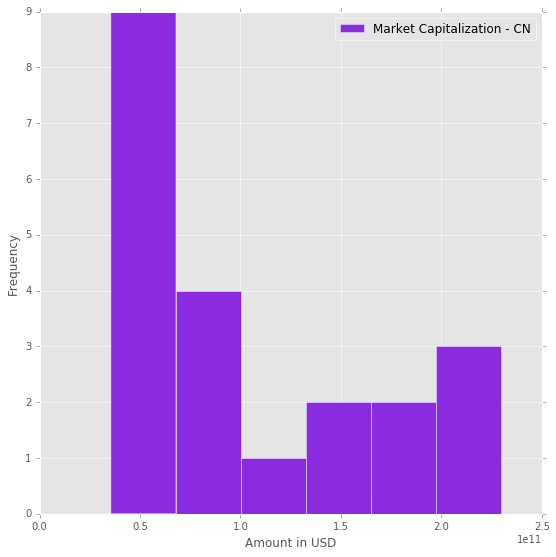

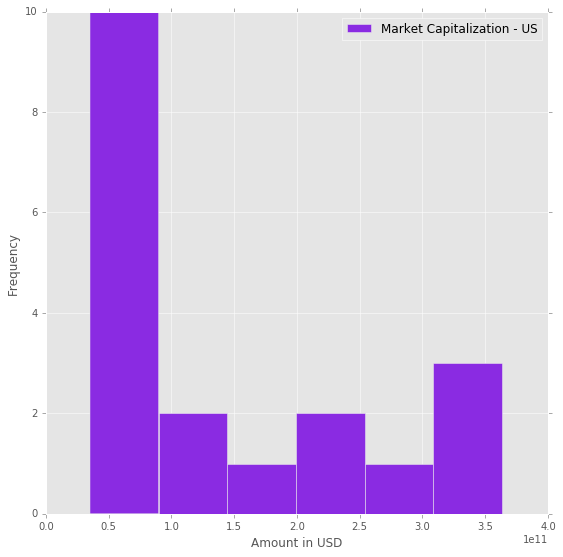

In [71]:
## Distribution plots

crossTable_country_mktCap = getSubCounts('CNTRY_OF_DOMICILE', 
                                         'CUR_MKT_CAP', 
                                         setX = set(df['CNTRY_OF_DOMICILE']), 
                                         setY = set(df['CUR_MKT_CAP']), 
                                         df = df)

# China:CN:=5, US:=9
mktCapCN = pd.DataFrame(crossTable_country_mktCap[4])
mktCapUS = pd.DataFrame(crossTable_country_mktCap[8])

mktCapCN = pd.DataFrame(mktCapCN.loc[mktCapCN['count'] == 1, 'item2'])
mktCapUS = pd.DataFrame(mktCapUS.loc[mktCapUS['count'] == 1, 'item2'])

mktCapCN = mktCapCN.rename(index=str, columns={"item2": "Market Capitalization - CN"})
mktCapCN = (mktCapCN).convert_objects(convert_numeric=True)
mktCapUS = mktCapUS.rename(index=str, columns={"item2": "Market Capitalization - US"})
mktCapUS = (mktCapUS).convert_objects(convert_numeric=True)

ax = mktCapCN.plot.hist(bins=6, color='blueviolet', figsize=(9,9))
ax.set_xlabel('Amount in USD')
plt.savefig("histogram" 
            + "market_cap_CN"
            + datetime.datetime.strftime(datetime.datetime.now(), '%Y-%m-%d')
            + ".eps", format='eps', dpi=1000, bbox_inches='tight')

ax = mktCapUS.plot.hist(bins=6, color='blueviolet', figsize=(9,9))
ax.set_xlabel('Amount in USD')
plt.savefig("histogram" 
            + "market_cap_US"
            + datetime.datetime.strftime(datetime.datetime.now(), '%Y-%m-%d')
            + ".eps", format='eps', dpi=1000, bbox_inches='tight')

